# **Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings as wr
wr.filterwarnings("ignore")

# **Load Dataset**

In [2]:
file_path = "/content/brain_tumor_dataset.csv"
df = pd.read_csv(file_path)

# **Basic info**

In [3]:
df.head()

,Patient_ID,Age,Gender,Tumor_Type,Tumor_Size,Location,Histology,Stage,Symptom_1,Symptom_2,Symptom_3,Radiation_Treatment,Surgery_Performed,Chemotherapy,Survival_Rate,Tumor_Growth_Rate,Family_History,MRI_Result,Follow_Up_Required
0,1,73,Male,Malignant,5.375612,Temporal,Astrocytoma,III,Vision Issues,Seizures,Seizures,No,No,No,51.312579,0.111876,No,Positive,Yes
1,2,26,Male,Benign,4.847098,Parietal,Glioblastoma,II,Headache,Headache,Nausea,Yes,Yes,Yes,46.373273,2.165736,Yes,Positive,Yes
2,3,31,Male,Benign,5.588391,Parietal,Meningioma,I,Vision Issues,Headache,Seizures,No,No,No,47.072221,1.884228,No,Negative,No
3,4,29,Male,Malignant,1.436600,Temporal,Medulloblastoma,IV,Vision Issues,Seizures,Headache,Yes,No,Yes,51.853634,1.283342,Yes,Negative,No
4,5,54,Female,Benign,2.417506,Parietal,Glioblastoma,I,Headache,Headache,Seizures,No,No,Yes,54.708987,2.069477,No,Positive,Yes


In [4]:
df.describe()

,Patient_ID,Age,Tumor_Size,Survival_Rate,Tumor_Growth_Rate
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,10000.500000,49.433700,5.236552,70.131699,1.547701
std,5773.647028,17.389296,2.754359,17.270834,0.835995
min,1.000000,20.000000,0.500410,40.002386,0.100017
25%,5000.750000,34.000000,2.836686,55.224439,0.830433
50%,10000.500000,49.000000,5.200675,70.305066,1.541821
75%,15000.250000,65.000000,7.624299,85.043395,2.262484
max,20000.000000,79.000000,9.999420,99.998125,2.999835


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Patient_ID           20000 non-null  int64  
 1   Age                  20000 non-null  int64  
 2   Gender               20000 non-null  object 
 3   Tumor_Type           20000 non-null  object 
 4   Tumor_Size           20000 non-null  float64
 5   Location             20000 non-null  object 
 6   Histology            20000 non-null  object 
 7   Stage                20000 non-null  object 
 8   Symptom_1            20000 non-null  object 
 9   Symptom_2            20000 non-null  object 
 10  Symptom_3            20000 non-null  object 
 11  Radiation_Treatment  20000 non-null  object 
 12  Surgery_Performed    20000 non-null  object 
 13  Chemotherapy         20000 non-null  object 
 14  Survival_Rate        20000 non-null  float64
 15  Tumor_Growth_Rate    20000 non-null 

# **Missing Values**

In [6]:
missing_values = df.isnull().sum()
missing_values

,0
Patient_ID,0
Age,0
Gender,0
Tumor_Type,0
Tumor_Size,0
Location,0
Histology,0
Stage,0
Symptom_1,0
Symptom_2,0


In [7]:
#duplicate Values
duplicate_values = df.duplicated().sum()
duplicate_values

np.int64(0)

# **Data Visualization**

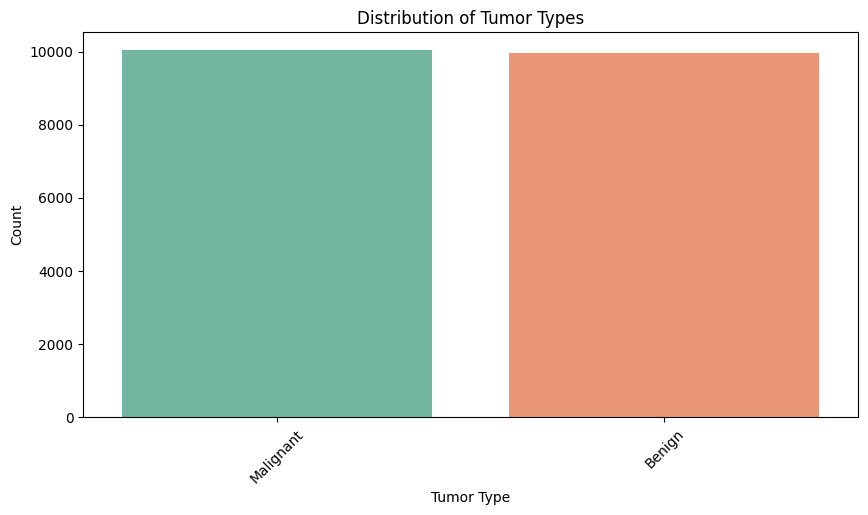

In [8]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="Tumor_Type", order=df["Tumor_Type"].value_counts().index, palette="Set2")
plt.xticks(rotation=45)
plt.title("Distribution of Tumor Types")
plt.xlabel("Tumor Type")
plt.ylabel("Count")
plt.show()

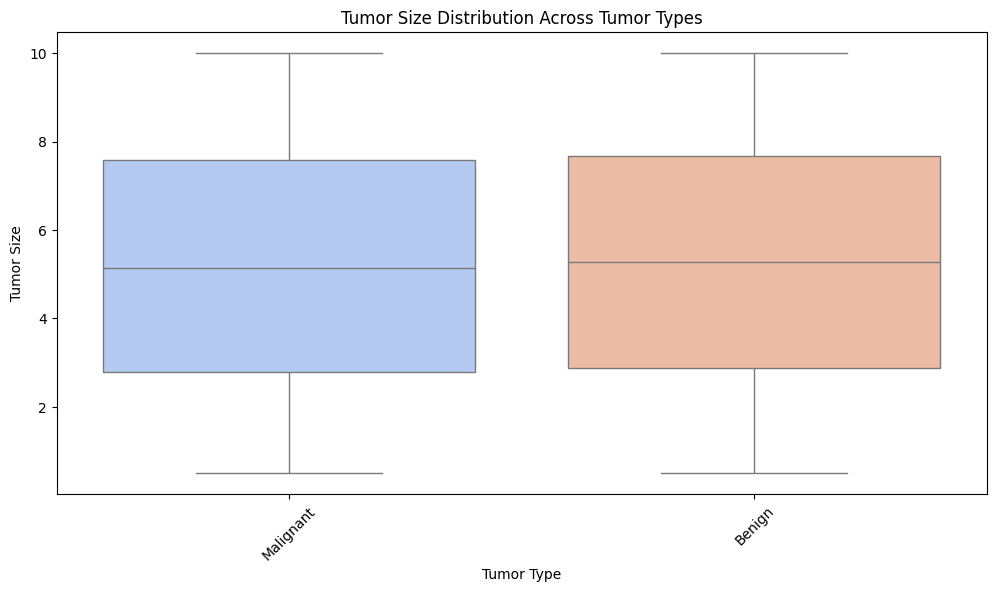

In [9]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="Tumor_Type", y="Tumor_Size", palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Tumor Size Distribution Across Tumor Types")
plt.xlabel("Tumor Type")
plt.ylabel("Tumor Size")
plt.show()

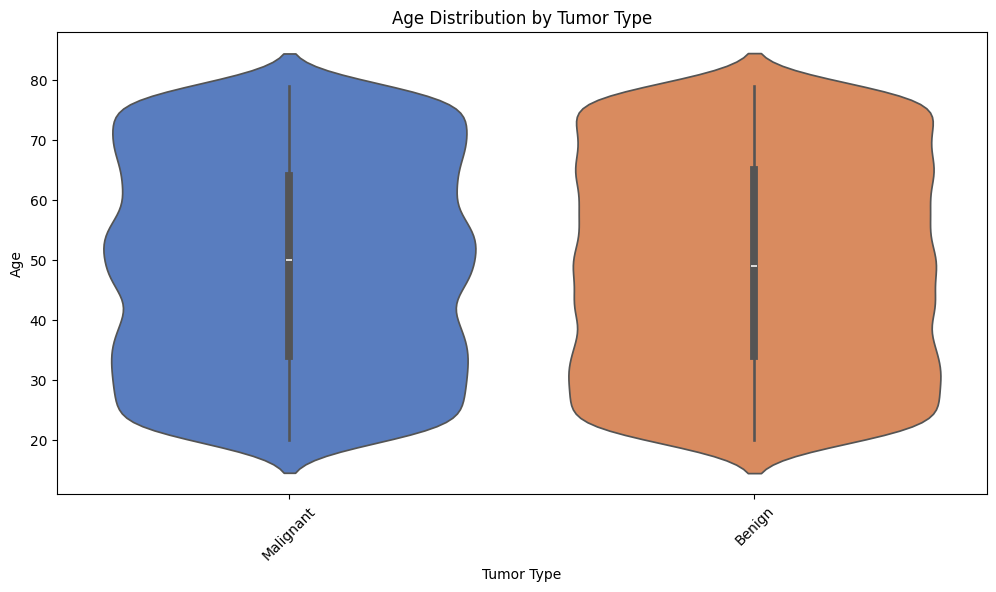

In [10]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x="Tumor_Type", y="Age", palette="muted")
plt.xticks(rotation=45)
plt.title("Age Distribution by Tumor Type")
plt.xlabel("Tumor Type")
plt.ylabel("Age")
plt.show()

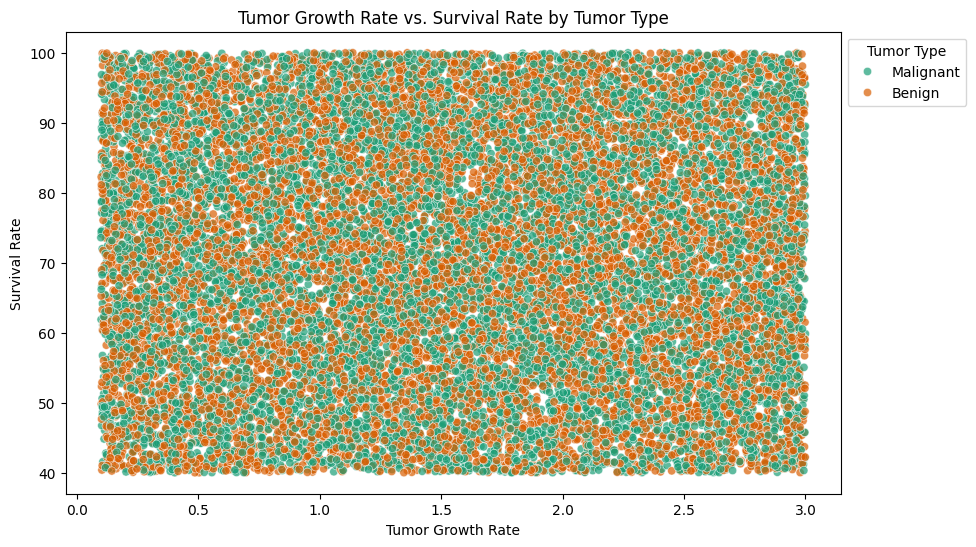

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Tumor_Growth_Rate", y="Survival_Rate", hue="Tumor_Type", palette="Dark2", alpha=0.7)
plt.title("Tumor Growth Rate vs. Survival Rate by Tumor Type")
plt.xlabel("Tumor Growth Rate")
plt.ylabel("Survival Rate")
plt.legend(title="Tumor Type", bbox_to_anchor=(1, 1))
plt.show()

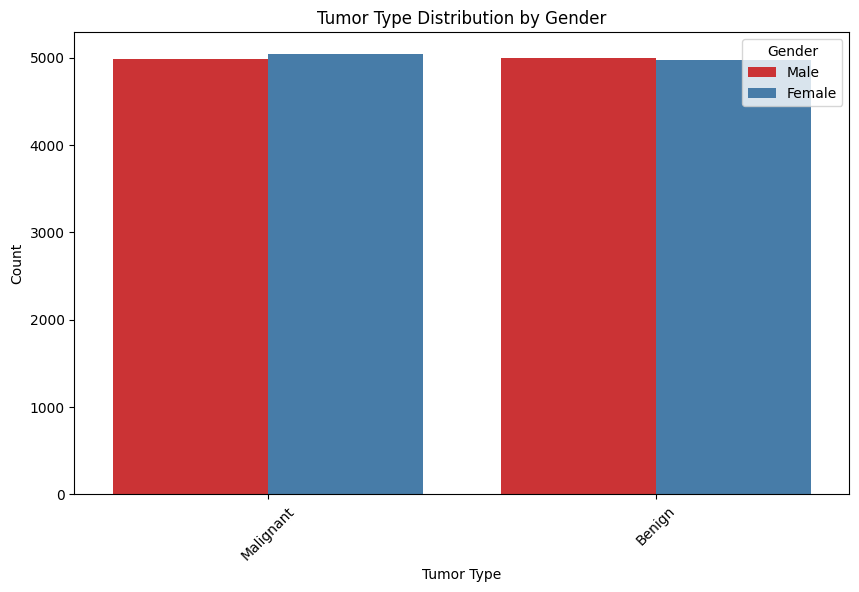

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Tumor_Type", hue="Gender", palette="Set1")
plt.xticks(rotation=45)
plt.title("Tumor Type Distribution by Gender")
plt.xlabel("Tumor Type")
plt.ylabel("Count")
plt.legend(title="Gender")
plt.show()

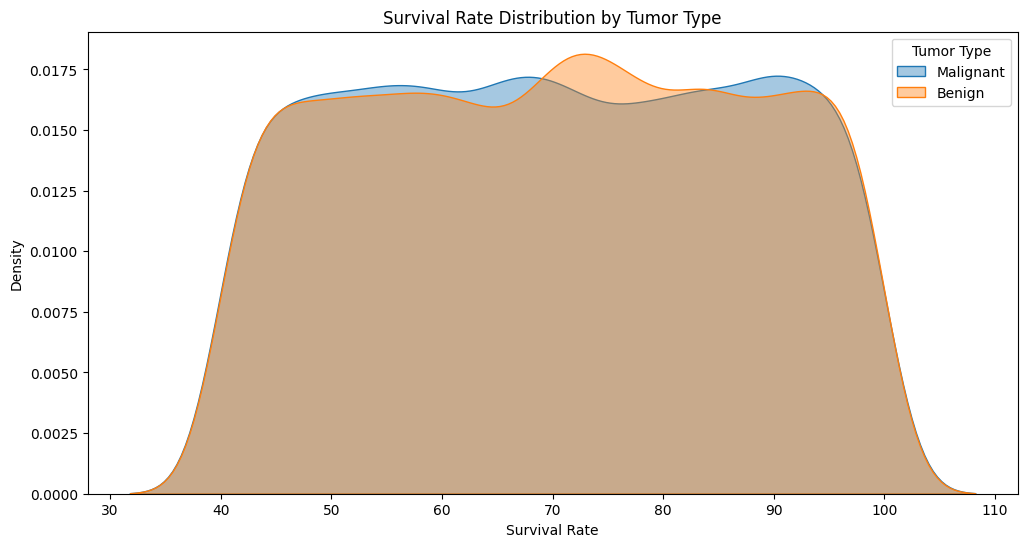

In [13]:
plt.figure(figsize=(12, 6))
for tumor in df["Tumor_Type"].unique():
    subset = df[df["Tumor_Type"] == tumor]
    sns.kdeplot(subset["Survival_Rate"], label=tumor, fill=True, alpha=0.4)

plt.title("Survival Rate Distribution by Tumor Type")
plt.xlabel("Survival Rate")
plt.ylabel("Density")
plt.legend(title="Tumor Type")
plt.show()

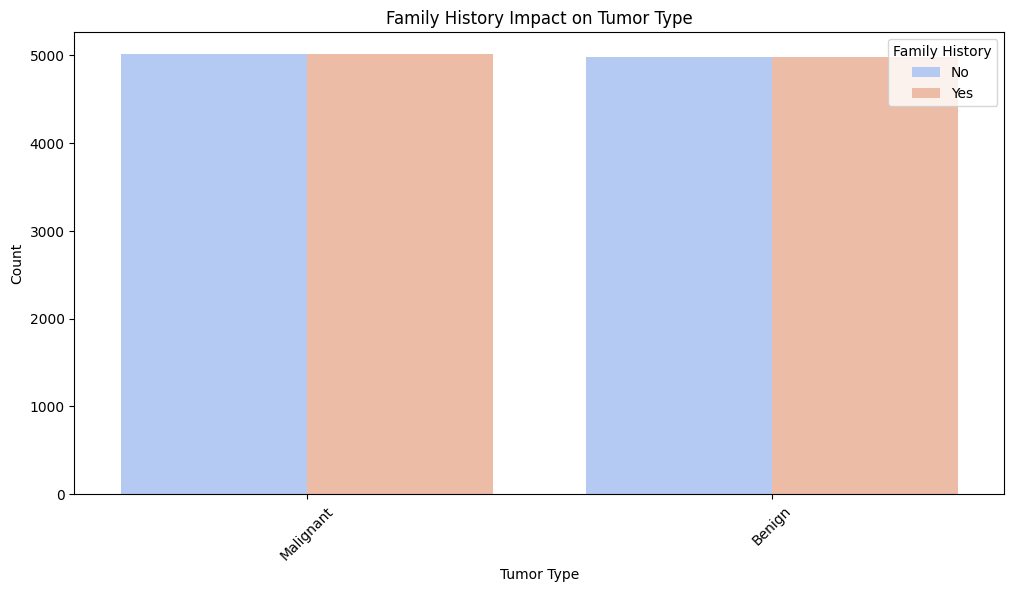

In [14]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="Tumor_Type", hue="Family_History", palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Family History Impact on Tumor Type")
plt.xlabel("Tumor Type")
plt.ylabel("Count")
plt.legend(title="Family History")
plt.show()

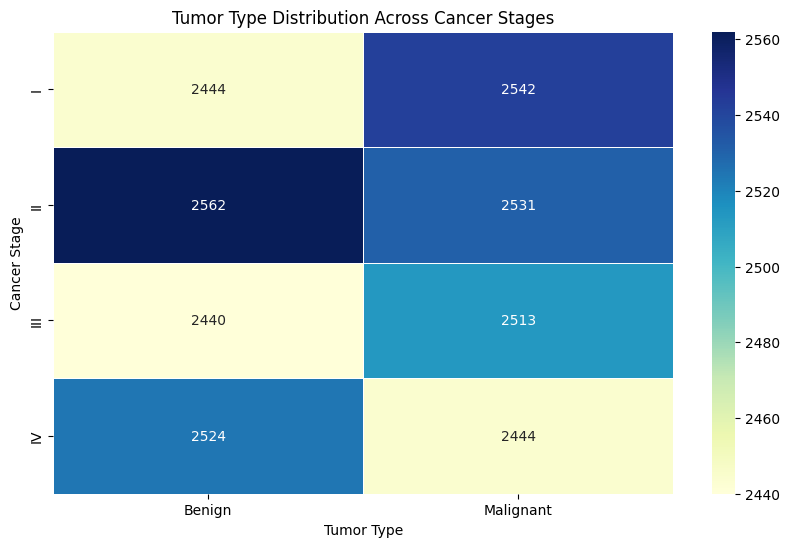

In [15]:
plt.figure(figsize=(10, 6))
tumor_stage_pivot = df.pivot_table(index="Stage", columns="Tumor_Type", aggfunc="size", fill_value=0)
sns.heatmap(tumor_stage_pivot, cmap="YlGnBu", annot=True, fmt="d", linewidths=0.5)
plt.title("Tumor Type Distribution Across Cancer Stages")
plt.xlabel("Tumor Type")
plt.ylabel("Cancer Stage")
plt.show()

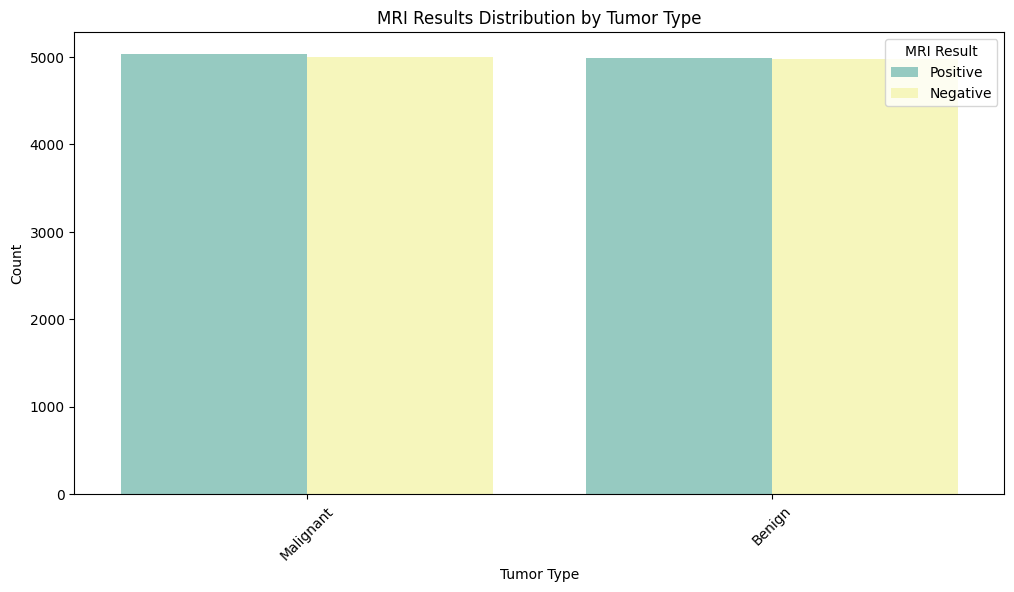

In [16]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="Tumor_Type", hue="MRI_Result", palette="Set3")
plt.xticks(rotation=45)
plt.title("MRI Results Distribution by Tumor Type")
plt.xlabel("Tumor Type")
plt.ylabel("Count")
plt.legend(title="MRI Result")
plt.show()

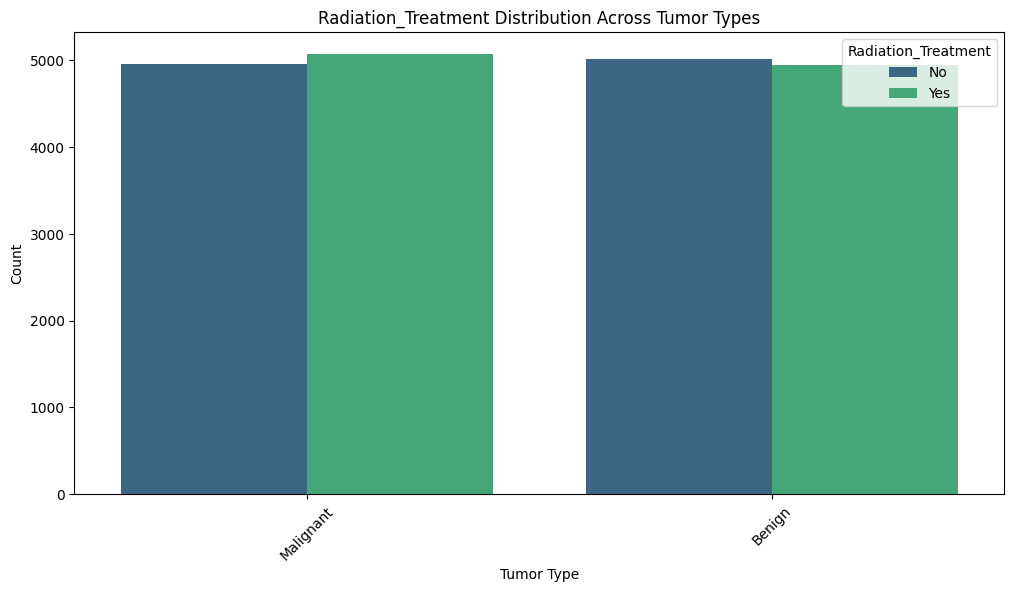

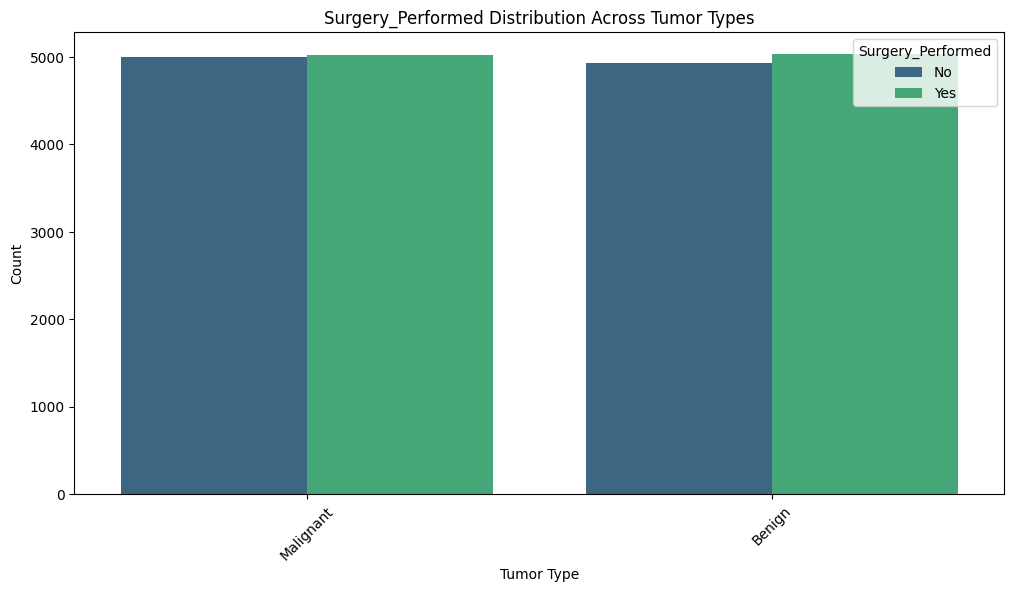

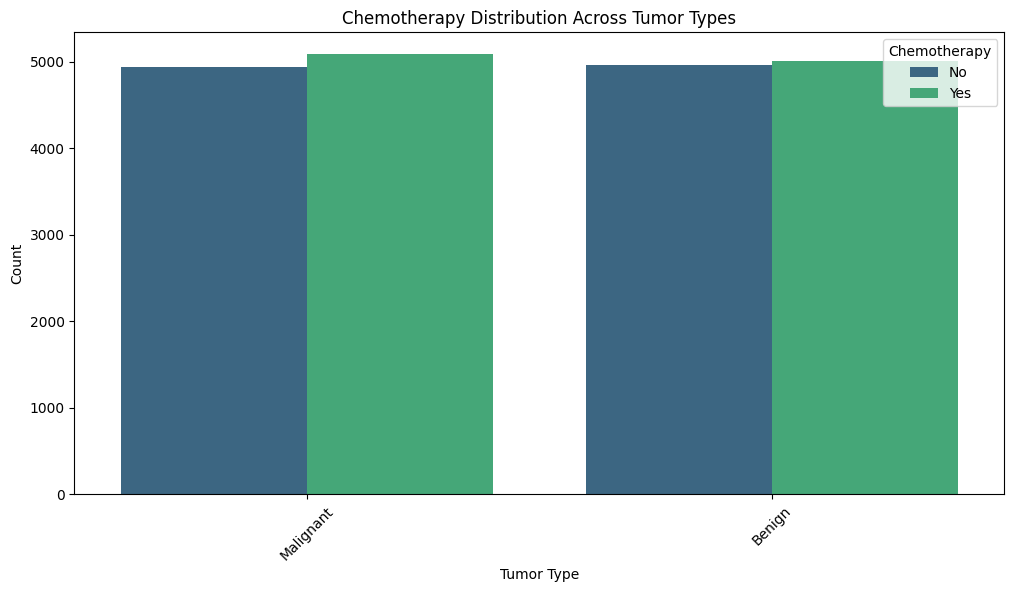

In [17]:
treatments = ["Radiation_Treatment", "Surgery_Performed", "Chemotherapy"]

for treatment in treatments:
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, x="Tumor_Type", hue=treatment, palette="viridis")
    plt.xticks(rotation=45)
    plt.title(f"{treatment} Distribution Across Tumor Types")
    plt.xlabel("Tumor Type")
    plt.ylabel("Count")
    plt.legend(title=treatment)
    plt.show()

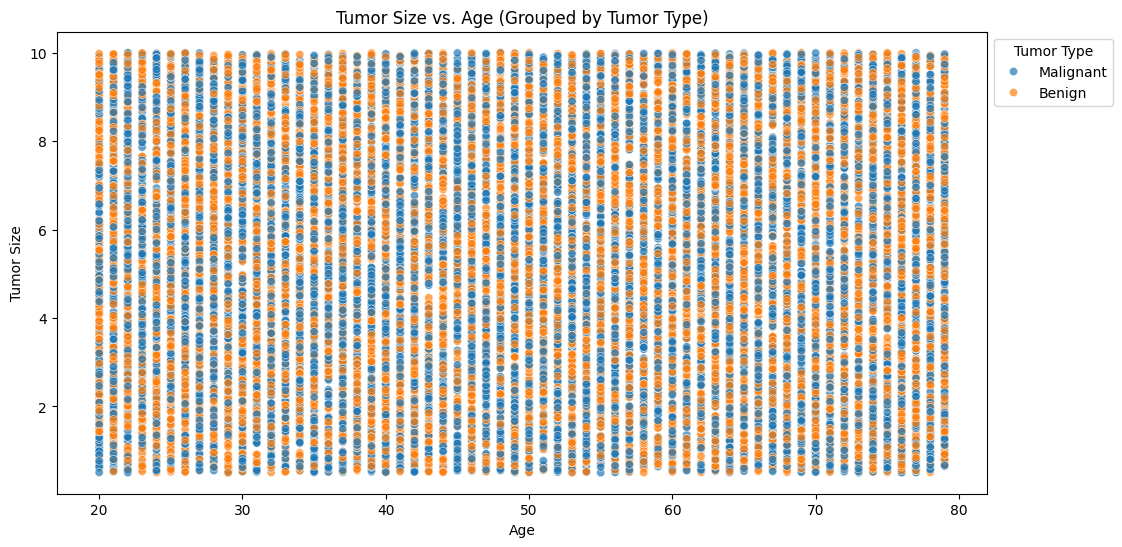

In [18]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x="Age", y="Tumor_Size", hue="Tumor_Type", palette="tab10", alpha=0.7)
plt.title("Tumor Size vs. Age (Grouped by Tumor Type)")
plt.xlabel("Age")
plt.ylabel("Tumor Size")
plt.legend(title="Tumor Type", bbox_to_anchor=(1, 1))
plt.show()

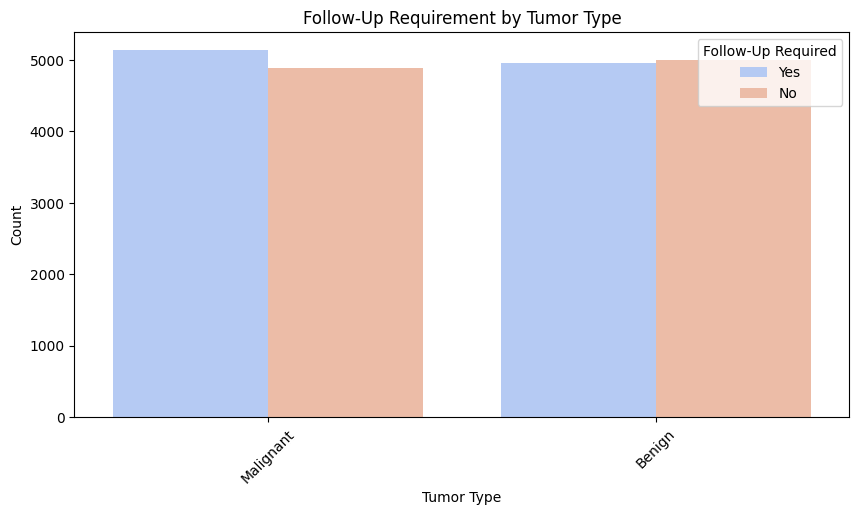

In [19]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="Tumor_Type", hue="Follow_Up_Required", palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Follow-Up Requirement by Tumor Type")
plt.xlabel("Tumor Type")
plt.ylabel("Count")
plt.legend(title="Follow-Up Required")
plt.show()

In [20]:
numerical_features = df.select_dtypes(include=["int64", "float64"]).columns
print("Numerical Features:", numerical_features)

Numerical Features: Index(['Patient_ID', 'Age', 'Tumor_Size', 'Survival_Rate',
       'Tumor_Growth_Rate'],
      dtype='object')


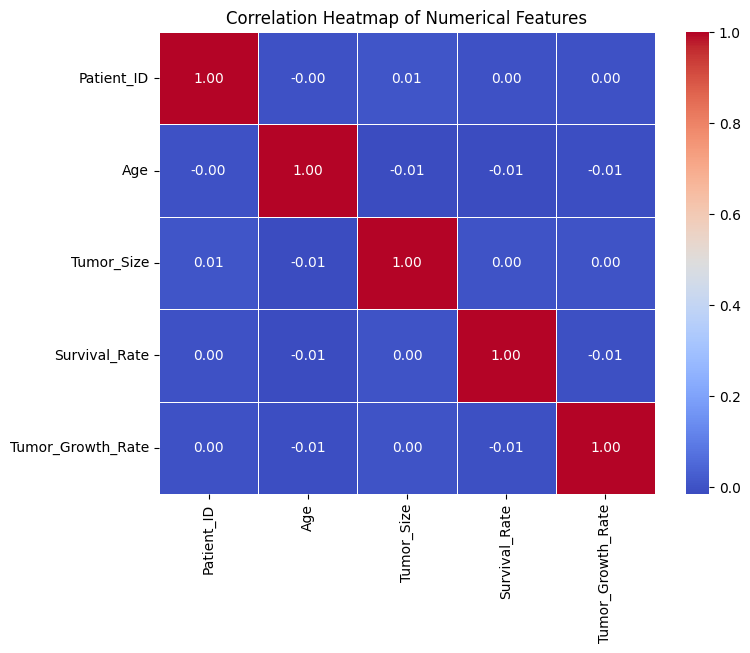

In [21]:
corr_matrix = df[numerical_features].corr() # Select the numerical features from the DataFrame before calculating correlation
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

# **Outliers**

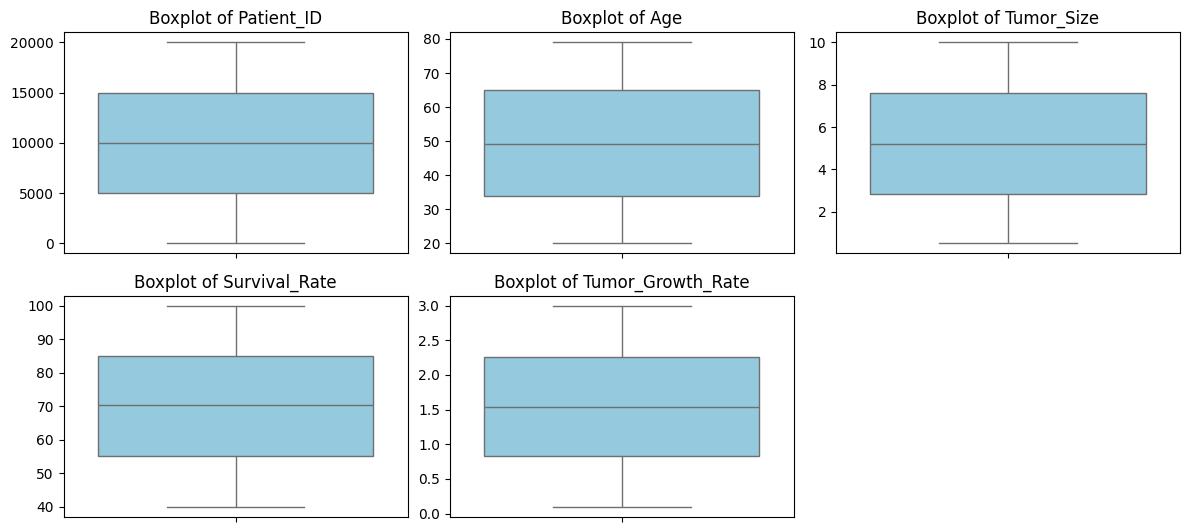

In [22]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)  # Adjust grid size if needed
    sns.boxplot(y=df[col], color="skyblue")
    plt.title(f"Boxplot of {col}")
    plt.ylabel("")
plt.tight_layout()
plt.show()

In [23]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Detect outliers for each numerical feature
outlier_counts = {}
for col in numerical_features:
    outliers = detect_outliers_iqr(df, col)
    outlier_counts[col] = len(outliers)

# Print outliers count per feature
print("Outlier Counts per Numerical Feature:")
print(outlier_counts)

Outlier Counts per Numerical Feature:
{'Patient_ID': 0, 'Age': 0, 'Tumor_Size': 0, 'Survival_Rate': 0, 'Tumor_Growth_Rate': 0}


# **Normalization**

In [24]:
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# **Encoding Categorical Features**

In [25]:
categorical_features = df.select_dtypes(include=["object"]).columns
print("Categorical Features:", categorical_features)

Categorical Features: Index(['Gender', 'Tumor_Type', 'Location', 'Histology', 'Stage', 'Symptom_1',
       'Symptom_2', 'Symptom_3', 'Radiation_Treatment', 'Surgery_Performed',
       'Chemotherapy', 'Family_History', 'MRI_Result', 'Follow_Up_Required'],
      dtype='object')


In [26]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for feature in categorical_features:
    df[feature] = label_encoder.fit_transform(df[feature])

# **Split data into training & testing sets**

In [27]:
X = df.drop(columns=["Tumor_Type"])
y = df["Tumor_Type"]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print dataset shapes
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (16000, 18) (16000,)
Testing set shape: (4000, 18) (4000,)


# **Machine Learning models**

***Logistic Regression, SVM, and Random Forest***

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [30]:
# Initialize models
log_reg = LogisticRegression(max_iter=500)
svm = SVC(kernel="rbf", probability=True)
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Train models
log_reg.fit(X_train, y_train)
svm.fit(X_train, y_train)
random_forest.fit(X_train, y_train)

# Make predictions
y_pred_logreg = log_reg.predict(X_test)
y_pred_svm = svm.predict(X_test)
y_pred_rf = random_forest.predict(X_test)

# Evaluate models
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

# Display detailed classification reports
print("\nLogistic Regression Report:\n", classification_report(y_test, y_pred_logreg))
print("\nSVM Report:\n", classification_report(y_test, y_pred_svm))
print("\nRandom Forest Report:\n", classification_report(y_test, y_pred_rf))

Logistic Regression Accuracy: 0.506
SVM Accuracy: 0.49375
Random Forest Accuracy: 0.4985

Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.51      0.47      0.49      1997
           1       0.51      0.54      0.52      2003

    accuracy                           0.51      4000
   macro avg       0.51      0.51      0.51      4000
weighted avg       0.51      0.51      0.51      4000


SVM Report:
               precision    recall  f1-score   support

           0       0.49      0.48      0.49      1997
           1       0.49      0.51      0.50      2003

    accuracy                           0.49      4000
   macro avg       0.49      0.49      0.49      4000
weighted avg       0.49      0.49      0.49      4000


Random Forest Report:
               precision    recall  f1-score   support

           0       0.50      0.51      0.51      1997
           1       0.50      0.48      0.49      2003

    accuracy             